purpose: check how the if using all of the round 10.2 rats as the reference population for MAGMA vs using just the rats from the NICSA study substantially changes the results. All rats is ~10.2k, so it took 6x as long.

# compare using all rats for referernce genome vs just the NICSA rats in study - cigday
    - all rats took about 6x as long to run

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
os.chdir('../magma/')

FileNotFoundError: [Errno 2] No such file or directory: '../nicsa_magma/'

## import ciday datasets

In [66]:
cigday_all=pd.read_csv('cigday_pc1_all_geno.genes.out',delim_whitespace=True,index_col=None,skiprows=1)

In [67]:
cigday=pd.read_csv('cigday_pc1_nicsa_geno.genes.out',delim_whitespace=True,index_col=None,skiprows=1)

## round the pvalues and zstats to compare

In [68]:
cigday_all['ZSTAT']=round(cigday_all['ZSTAT'],3)
cigday_all['P']=round(cigday_all['P'],3)

cigday['ZSTAT']=round(cigday['ZSTAT'],3)
cigday['P']=round(cigday['P'],3)

## compare zscores and pvalues

In [69]:
comp=cigday.merge(cigday_all[['GENE','ZSTAT','P']],on='GENE')
comp['ZSTAT_comp']=np.absolute(comp['ZSTAT_x']-comp['ZSTAT_y'])
comp['P_comp']=np.absolute(comp['P_x']-comp['P_y'])

In [70]:
comp.sort_values('P_comp',ascending=False)

,GENE,CHR,START,STOP,NSNPS,NPARAM,N,ZSTAT_x,P_x,ZSTAT_y,P_y,ZSTAT_comp,P_comp
11411,Ndufs1,9,64536430,64589751,11,1,2018,-1.327,0.908,-1.099,0.864,0.228,0.044
8918,RGD1564409,7,17301785,17340229,6,1,2018,-0.749,0.773,-0.897,0.815,0.148,0.042
17204,Fam50b,17,30164431,30203627,36,1,2018,-1.658,0.951,-1.367,0.914,0.291,0.037
10899,Arpp21,8,112024636,112209273,402,4,2018,-0.434,0.668,-0.338,0.632,0.096,0.036
9209,Odf1,7,69367427,69399662,30,1,2018,-0.630,0.736,-0.736,0.769,0.106,0.033
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8237,LOC690335,6,91697271,91717812,60,6,2018,0.697,0.243,0.697,0.243,0.000,0.000
8238,Six1,6,91736739,91761975,36,5,2018,0.775,0.219,0.775,0.219,0.000,0.000
8239,Six4,6,91792328,91826002,37,5,2018,0.558,0.288,0.559,0.288,0.001,0.000
8240,Mnat1,6,91804703,91981945,174,9,2018,0.864,0.194,0.864,0.194,0.000,0.000


(array([1.7348e+04, 9.1800e+02, 3.7800e+02, 1.1400e+02, 7.8000e+01,
        4.3000e+01, 4.9000e+01, 2.0000e+01, 1.6000e+01, 8.0000e+00]),
 array([0.    , 0.0025, 0.005 , 0.0075, 0.01  , 0.0125, 0.015 , 0.0175,
        0.02  , 0.0225, 0.025 ]),
 <BarContainer object of 10 artists>)

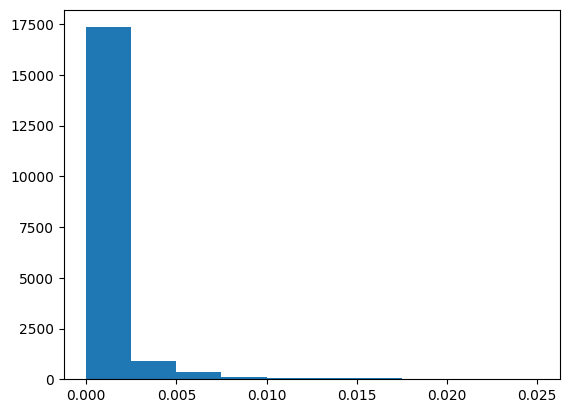

In [71]:
plt.hist(comp.P_comp, bins=None,histtype='bar', range=[0,0.025])

In [72]:
comp.sort_values('ZSTAT_comp',ascending=False)

,GENE,CHR,START,STOP,NSNPS,NPARAM,N,ZSTAT_x,P_x,ZSTAT_y,P_y,ZSTAT_comp,P_comp
9046,Zdhhc17,7,46359963,46443691,78,1,2018,-2.509,0.994,-4.813,1.000,2.304,0.006
9047,Osbpl8,7,46586944,46759888,70,1,2018,-2.509,0.994,-4.209,1.000,1.700,0.006
13490,Chmp2b,11,3327478,3374015,38,1,2018,-2.621,0.996,-4.309,1.000,1.688,0.004
9045,Csrp2,7,46339109,46377743,50,1,2018,-2.509,0.994,-4.058,1.000,1.549,0.006
498,C5ar2,1,76920381,76955432,34,1,2018,-2.498,0.994,-3.843,1.000,1.345,0.006
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9936,Or7g34b,8,17488328,17509266,119,2,2018,1.914,0.028,1.914,0.028,0.000,0.000
9937,Or7g35,8,17524811,17545749,87,1,2018,1.784,0.037,1.784,0.037,0.000,0.000
9939,Or7d12,8,17630305,17651246,39,2,2018,1.428,0.077,1.428,0.077,0.000,0.000
9941,Or7e171b,8,17708550,17729479,204,2,2018,0.744,0.229,0.744,0.229,0.000,0.000


(array([12579.,  2530.,  1350.,   601.,   500.,   215.,   176.,   112.,
          128.,    99.]),
 array([0.    , 0.0025, 0.005 , 0.0075, 0.01  , 0.0125, 0.015 , 0.0175,
        0.02  , 0.0225, 0.025 ]),
 <BarContainer object of 10 artists>)

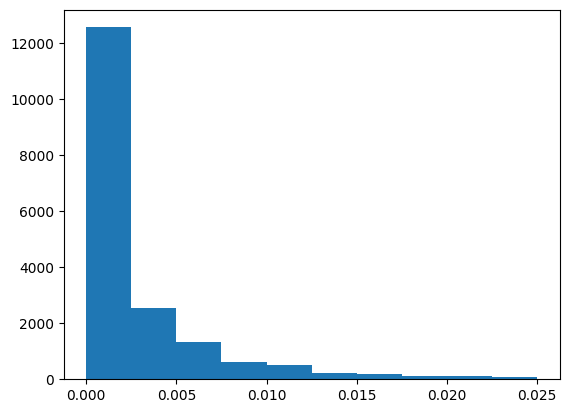

In [73]:
plt.hist(comp.ZSTAT_comp, bins=None,histtype='bar', range=[0,0.025])

# compare using all rats for referernce genome vs just the NICSA rats in study - smkinit
    - all rats took about 6x as long to run

## import ciday datasets

In [48]:
smkinit_all=pd.read_csv('smkinit_pc1_all_geno.genes.out',delim_whitespace=True,index_col=None,skiprows=1)

In [49]:
smkinit=pd.read_csv('smkinit_pc1_nicsa_geno.genes.out',delim_whitespace=True,index_col=None,skiprows=1)

## round the pvalues and zstats to compare

In [50]:
smkinit_all['ZSTAT']=round(smkinit_all['ZSTAT'],3)
smkinit_all['P']=round(smkinit_all['P'],3)

smkinit['ZSTAT']=round(smkinit['ZSTAT'],3)
smkinit['P']=round(smkinit['P'],3)

## compare zscores and pvalues

In [51]:
comp=smkinit.merge(smkinit_all[['GENE','ZSTAT','P']],on='GENE')
comp['ZSTAT_comp']=np.absolute(comp['ZSTAT_x']-comp['ZSTAT_y'])
comp['P_comp']=np.absolute(comp['P_x']-comp['P_y'])

In [52]:
comp.sort_values('P_comp',ascending=False)

,GENE,CHR,START,STOP,NSNPS,NPARAM,N,ZSTAT_x,P_x,ZSTAT_y,P_y,ZSTAT_comp,P_comp
18964,Zbtb24,20,44933302,44975329,109,1,2018,-1.232,0.891,-0.989,0.839,0.243,0.052
18988,LOC103694460,20,54404724,54428200,56,1,2018,-0.339,0.633,-0.464,0.679,0.125,0.046
18990,LOC120098985,20,54413518,54436320,39,1,2018,-0.330,0.629,-0.452,0.674,0.122,0.045
18987,Sim1,20,53817601,53917219,152,1,2018,-0.363,0.642,-0.489,0.687,0.126,0.045
17498,Stard4,18,24804683,24840024,45,1,2018,-1.370,0.915,-1.126,0.870,0.244,0.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7990,Sdc1,6,31552799,31595267,56,1,2018,0.301,0.382,0.300,0.382,0.001,0.000
7991,Laptm4a,6,31709287,31747023,39,2,2018,0.290,0.386,0.291,0.386,0.001,0.000
7992,Matn3,6,31738517,31778564,38,3,2018,0.373,0.355,0.373,0.355,0.000,0.000
7993,Wdr35,6,31761315,31841450,130,2,2018,0.802,0.211,0.803,0.211,0.001,0.000


(array([1.7376e+04, 8.7000e+02, 4.0500e+02, 9.7000e+01, 9.6000e+01,
        2.6000e+01, 5.5000e+01, 1.6000e+01, 1.7000e+01, 2.0000e+00]),
 array([0.    , 0.0025, 0.005 , 0.0075, 0.01  , 0.0125, 0.015 , 0.0175,
        0.02  , 0.0225, 0.025 ]),
 <BarContainer object of 10 artists>)

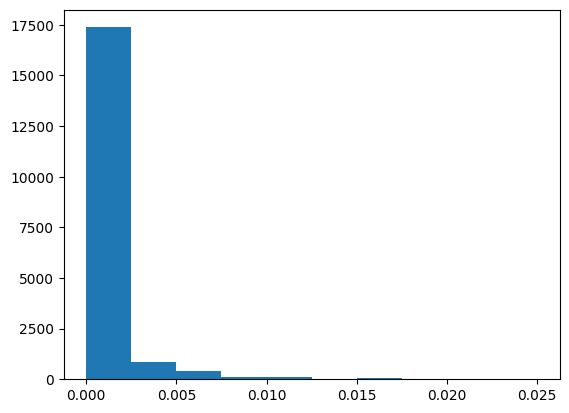

In [60]:
plt.hist(comp.P_comp, bins=None,histtype='bar', range=[0,0.025])

In [53]:
comp.sort_values('ZSTAT_comp',ascending=False)

,GENE,CHR,START,STOP,NSNPS,NPARAM,N,ZSTAT_x,P_x,ZSTAT_y,P_y,ZSTAT_comp,P_comp
13077,Eif1,10,85236751,85258842,22,1,2018,-2.828,0.998,-5.063,1.000,2.235,0.002
12407,LOC102554448,10,51222878,51243686,34,1,2018,-2.783,0.997,-4.280,1.000,1.497,0.003
100,Tbpl1,1,22767892,22813305,140,1,2018,-3.008,0.999,-4.474,1.000,1.466,0.001
13076,Krt42,10,85175186,85256520,88,1,2018,-2.576,0.995,-3.575,1.000,0.999,0.005
16358,Ndfip2,15,82022366,82097043,151,1,2018,-2.238,0.987,-3.206,0.999,0.968,0.012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9775,Atg101,7,132388477,132417643,43,1,2018,0.405,0.343,0.405,0.343,0.000,0.000
9776,Smim41,7,132400179,132423253,29,1,2018,0.402,0.344,0.402,0.344,0.000,0.000
9777,Krt80,7,132453216,132495134,120,1,2018,0.397,0.346,0.397,0.346,0.000,0.000
9778,Krt7,7,132518881,132555052,84,1,2018,0.437,0.331,0.437,0.331,0.000,0.000


(array([12980.,  2411.,  1315.,   544.,   419.,   204.,   172.,   107.,
          109.,    77.]),
 array([0.    , 0.0025, 0.005 , 0.0075, 0.01  , 0.0125, 0.015 , 0.0175,
        0.02  , 0.0225, 0.025 ]),
 <BarContainer object of 10 artists>)

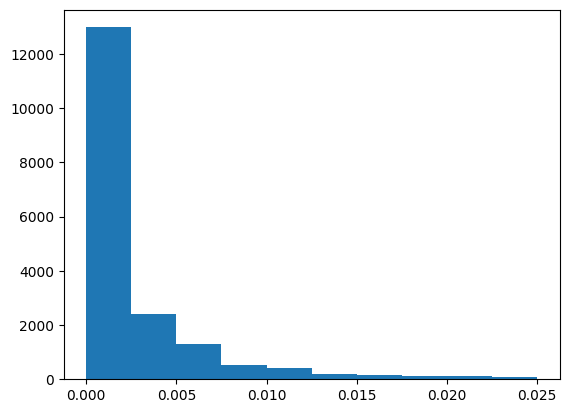

In [64]:
plt.hist(comp.ZSTAT_comp, bins=None,histtype='bar', range=[0,0.025])